In [181]:
import os
import math

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [182]:
# import cv2
# import numpy as np
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt

# # 2. Feature 생성 함수
# def extract_features(gray):
#     # Sobel (gradient)
#     sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
#     sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
#     grad_mag = np.sqrt(sobel_x**2 + sobel_y**2)

#     # 위치 정보 추가 (x, y)
#     h, w = gray.shape
#     xx, yy = np.meshgrid(np.arange(w), np.arange(h))

#     # feature: [intensity, grad_mag, x, y]
#     features = np.stack([gray, grad_mag, xx, yy], axis=-1)
#     return features.reshape(-1, 4)

# # 3. 임시 마스크 생성 (demo용으로 눈금선 영역 수동으로 지정, 실제는 레이블 필요)
# # 아래는 중앙에 있는 수직선 10픽셀 너비 박스를 정답으로 간주
# cbccc = crop_blur_copy_crop.copy()
# label_mask = marks2

# # 4. 학습용 데이터 준비
# X = extract_features(cbccc)
# # y = label_mask.flatten()
# y = label_mask

# # 5. 샘플링 (0,1 불균형 방지)
# X_train, _, y_train, _ = train_test_split(X, y, train_size=0.05, stratify=y)

# # 6. 모델 학습
# clf = RandomForestClassifier(n_estimators=100, random_state=42)
# clf.fit(X_train, y_train)

# # 7. 전체 이미지 예측
# y_pred = clf.predict(X)
# pred_mask = y_pred.reshape(cbccc.shape)

# # 8. 결과 시각화
# plt.figure(figsize=(15,5))
# plt.subplot(1,3,1); plt.imshow(cbccc, cmap='gray'); plt.title("Original")
# plt.subplot(1,3,2); plt.imshow(label_mask, cmap='gray'); plt.title("Label (Fake)")
# plt.subplot(1,3,3); plt.imshow(pred_mask, cmap='gray'); plt.title("Prediction")
# plt.tight_layout()
# plt.show()


In [ ]:
# import pytesseract
# from pytesseract import Output

# pytesseract.pytesseract.tesseract_cmd = r"C:/Program Files/Tesseract-OCR/tesseract.exe"

# prepro_img = crop_image.copy()
# prepro_img = cv2.transpose(prepro_img)
# prepro_img = cv2.flip(prepro_img, 0)  # 0: 상하, 1: 좌우, -1: 상하+좌우
# prepro_img = cv2.resize(prepro_img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
# print(prepro_img.shape)
# clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
# prepro_img = clahe.apply(prepro_img)
# prepro_img = cv2.blur(prepro_img, (5, 5), 1.5)

# # sobel_x = cv2.Sobel(prepro_img, cv2.CV_64F, 1, 0, ksize=3)
# # sobel_y = cv2.Sobel(prepro_img, cv2.CV_64F, 0, 1, ksize=3)
# # grad_mag = np.sqrt(sobel_x**2 + sobel_y**2)
# # grad_mag = np.uint8(255 * grad_mag / np.max(grad_mag))

# # _, prepro_img = cv2.threshold(grad_mag, 80, 255, cv2.THRESH_BINARY)

# # prepro_img = cv2.adaptiveThreshold(
# #     prepro_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
# #     cv2.THRESH_BINARY_INV, 11, 2
# # )

# custom_config = r'--oem 3 --psm 6 outputbase digits'  # 숫자만 인식
# ocr_data = pytesseract.image_to_data(prepro_img, config=custom_config, output_type=Output.DICT)
# print("ocr_data:", ocr_data)

# # OCR 결과 시각화
# white = (255, 255, 255)
# black = (0, 0, 0)
# color = black
# for i in range(len(ocr_data['text'])):
#     text = ocr_data['text'][i]
#     if text.strip().isdigit():
#         x, y, w, h = ocr_data['left'][i], ocr_data['top'][i], ocr_data['width'][i], ocr_data['height'][i]
#         cv2.rectangle(prepro_img, (x, y), (x + w, y + h), color, 3)
#         cv2.putText(prepro_img, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

# plt.figure(figsize=(10, 5))
# plt.imshow(prepro_img, cmap='gray')
# plt.axis("off")
# plt.tight_layout()

# plt.show()

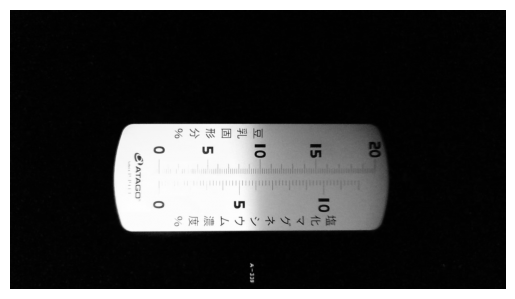

In [306]:
# image_path = os.path.join("images", '7.0', '5', 'WIN_20250515_13_42_56_Pro (2).jpg')
image_path = os.path.join("yolo_run", 'real_test.jpg')
image = cv2.imread(image_path)
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.show()

In [307]:
def find_edges_dot(img, threshold):
    h, w = img.shape
    center_y, center_x = h // 2, w // 2
    results = {}

    # 상단에서 아래
    for y in range(center_y):
        if img[y, center_x] > threshold:
            results['top'] = y
            break
    else: results['top'] = 0

    # 하단에서 위
    for y in range(h - 1, center_y, -1):
        if img[y, center_x] > threshold:
            results['bottom'] = y
            break
    else: results['bottom'] = h - 1

    # 왼쪽에서 오른쪽
    for x in range(center_x):
        if img[center_y, x] > threshold:
            results['left'] = x
            break
    else: results['left'] = 0

    # 오른쪽에서 왼쪽
    for x in range(w - 1, center_x, -1):
        if img[center_y, x] > threshold:
            results['right'] = x
            break
    else: results['right'] = w - 1

    return results

In [308]:
edges = find_edges_dot(gray_img, 50)
print(edges)

{'top': 441, 'bottom': 855, 'left': 412, 'right': 1443}


In [309]:
def find_edges_line(img, hor_threshold, ver_threshold):
    h, w = img.shape
    center_y, center_x = h // 2, w // 2
    results = {}

    # 상단에서 아래
    for y in range(center_y):
        if np.sum(img[y, :]) > hor_threshold:
            results['top'] = y
            break
    else: results['top'] = 0

    # 하단에서 위
    for y in range(h - 1, center_y, -1):
        if np.sum(img[y, :]) > hor_threshold:
            results['bottom'] = y
            break
    else: results['bottom'] = h - 1

    # 왼쪽에서 오른쪽
    for x in range(center_x):
        if np.sum(img[:, x]) > ver_threshold:
            results['left'] = x
            break
    else: results['left'] = 0

    # 오른쪽에서 왼쪽
    for x in range(w - 1, center_x, -1):
        if np.sum(img[:, x]) > ver_threshold:
            results['right'] = x
            break
    else: results['right'] = w - 1

    return results

In [310]:
line_edges = find_edges_line(gray_img, 15000, 20000)
print(line_edges)

{'top': 439, 'bottom': 861, 'left': 403, 'right': 1450}


sum of top edge: 120311
sum of bottom edge: 105743
sum of left edge: 55575
sum of right edge: 25418


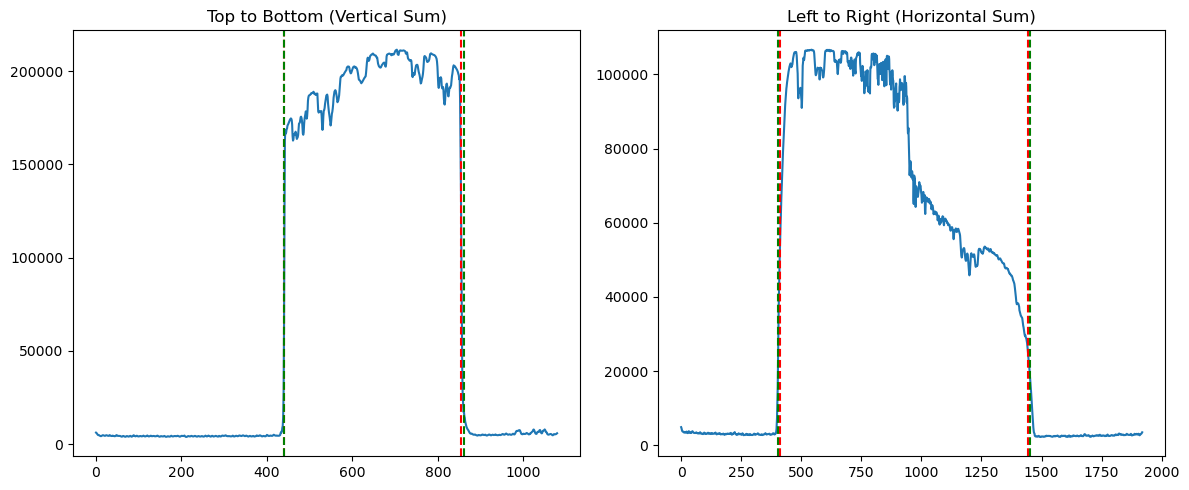

In [311]:
h, w = gray_img.shape
center_y, center_x = h // 2, w // 2

# 각 방향에서 중심선 픽셀 합 구하기
top_line_sums = [np.sum(gray_img[y, :]) for y in range(h)]
bottom_line_sums = [np.sum(gray_img[y, :]) for y in range(h - 1, 0, -1)]
left_line_sums = [np.sum(gray_img[:, x]) for x in range(w)]
right_line_sums = [np.sum(gray_img[:, x]) for x in range(w - 1, 0, -1)]

print("sum of top edge:", np.sum(top_line_sums[edges['top']]))
print("sum of bottom edge:", np.sum(top_line_sums[edges['bottom']]))
print("sum of left edge:", np.sum(left_line_sums[edges['left']]))
print("sum of right edge:", np.sum(left_line_sums[edges['right']]))

# 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(top_line_sums)
plt.axvline(x=edges["top"], color='red', linestyle='--', label='Edge Top')
plt.axvline(x=edges["bottom"], color='red', linestyle='--', label='Edge Bottom')
plt.axvline(x=line_edges["top"], color='green', linestyle='--', label='LineEdge Top')
plt.axvline(x=line_edges["bottom"], color='green', linestyle='--', label='LineEdge Bottom')
plt.title("Top to Bottom (Vertical Sum)")
plt.subplot(1, 2, 2)
plt.plot(left_line_sums)
plt.axvline(x=edges["left"], color='red', linestyle='--', label='Edge left')
plt.axvline(x=edges["right"], color='red', linestyle='--', label='Edge right')
plt.axvline(x=line_edges["left"], color='green', linestyle='--', label='LineEdge left')
plt.axvline(x=line_edges["right"], color='green', linestyle='--', label='LineEdge right')
plt.title("Left to Right (Horizontal Sum)")
plt.tight_layout()
plt.show()

dot crop
 height: 414 width: 1031
{'top': 441, 'bottom': 855, 'left': 412, 'right': 1443}
line crop
 height: 422 width: 1047
{'top': 439, 'bottom': 861, 'left': 403, 'right': 1450}


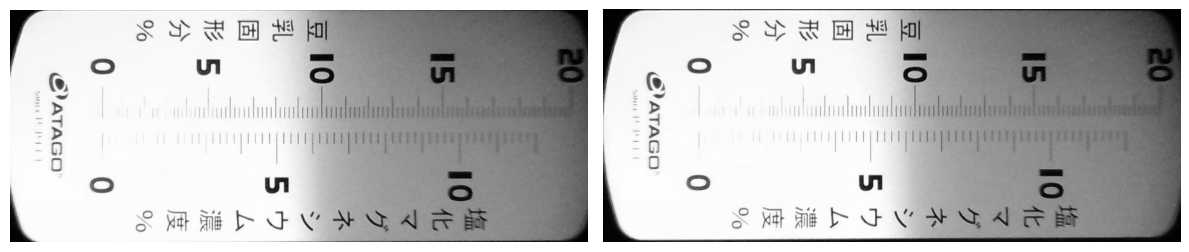

In [312]:
cropped_img = gray_img[edges['top']:edges['bottom'], edges['left']:edges['right']]
line_cropped_img = gray_img[line_edges['top']:line_edges['bottom'], line_edges['left']:line_edges['right']]

print("dot crop\n", "height:", cropped_img.shape[0], "width:", cropped_img.shape[1])
print(edges)
print("line crop\n", "height:", line_cropped_img.shape[0], "width:", line_cropped_img.shape[1])
print(line_edges)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(line_cropped_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.tight_layout()
plt.show()

Line: (471, 441) to (1340, 441), Angle: 0.00 degrees
Line: (503, 857) to (1075, 853), Angle: -0.40 degrees
Line: (484, 440) to (1180, 440), Angle: 0.00 degrees
Line: (1076, 853) to (1294, 852), Angle: -0.26 degrees
Average angle: -0.17 degrees
Average angle: -0.17 degrees


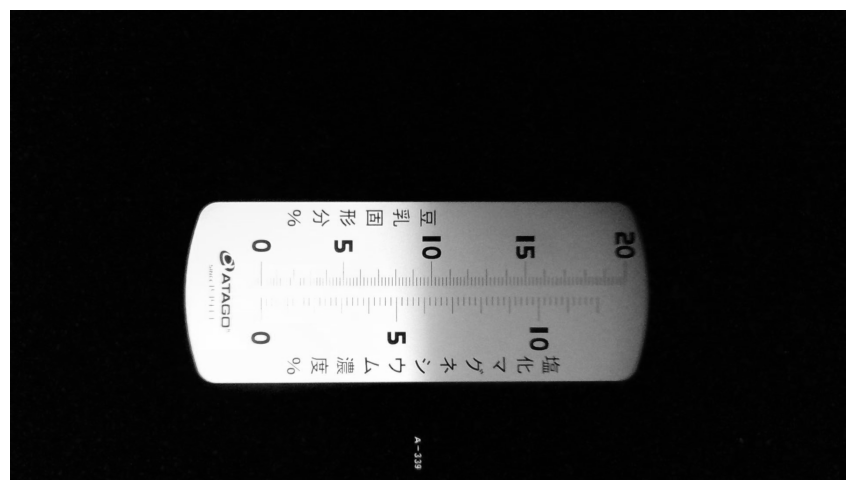

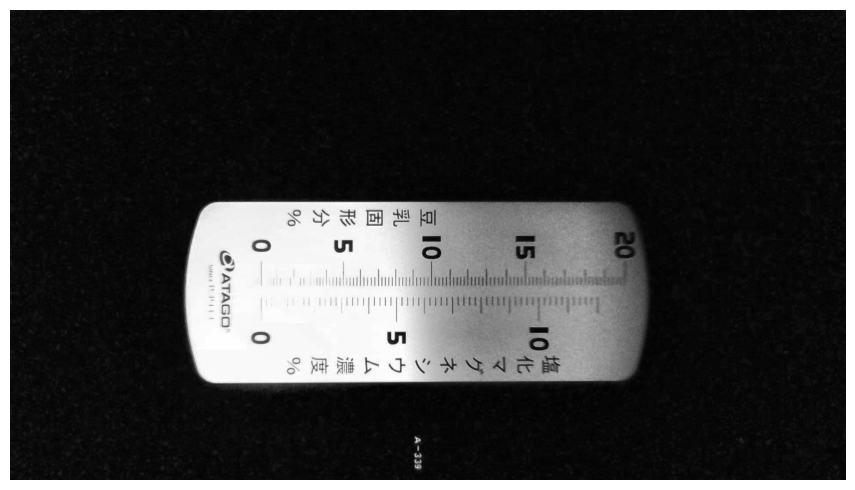

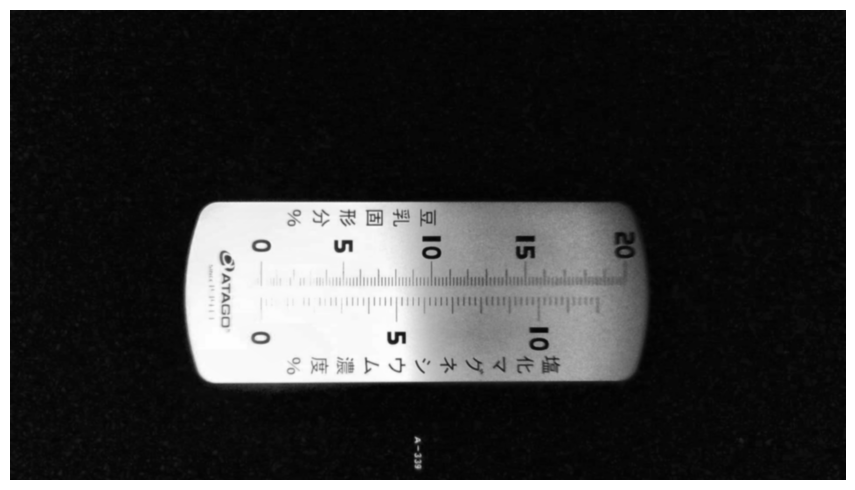

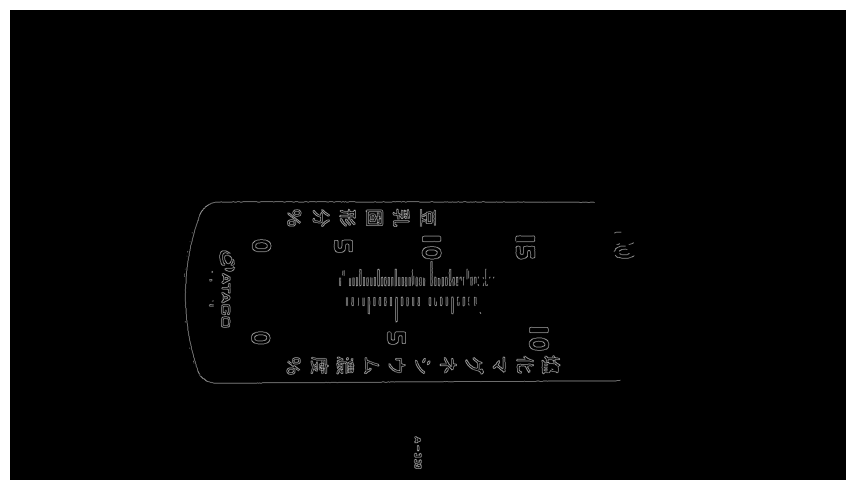

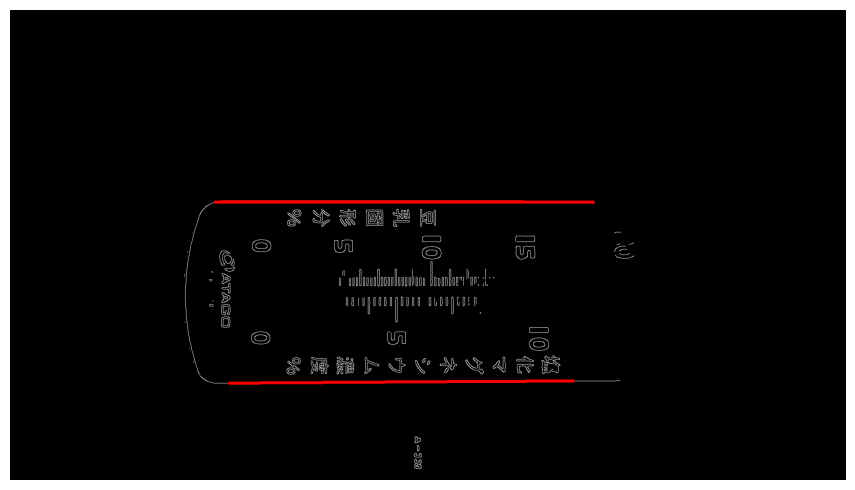

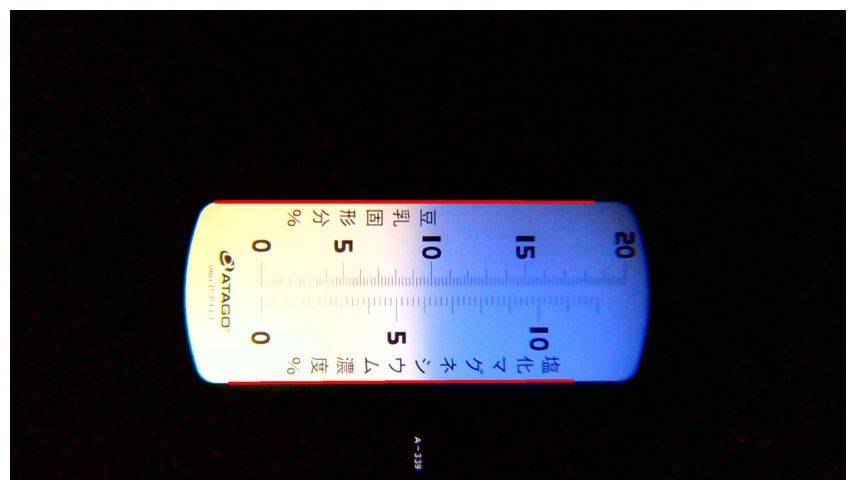

In [190]:
image_path = os.path.join("yolo_run", 'real_test.jpg')
image = cv2.imread(image_path)
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

img_copy = image.copy()
gray_copy = gray_img.copy()

th1, th2 = 120, 150
hough_th, hough_min, hough_max = 150, 50, 50

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
equalized = clahe.apply(gray_copy)
blurred = cv2.GaussianBlur(equalized, (5, 5), 1.5)
edges = cv2.Canny(blurred, th1, th2, apertureSize=3)
lines = cv2.HoughLinesP(edges, 1, np.pi/360, threshold=hough_th, minLineLength=hough_min, maxLineGap=hough_max)
edges_copy = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

angles = []
if lines is not None:
    for x1, y1, x2, y2 in lines[:, 0]:
        cv2.line(img_copy, (x1, y1), (x2, y2), (0, 0, 255), 6)
        cv2.line(edges_copy, (x1, y1), (x2, y2), (0, 0, 255), 6)

        angle_rad = math.atan2((y2 - y1), (x2 - x1))
        angle_deg = math.degrees(angle_rad)
        angles.append(angle_deg)
        print(f"Line: ({x1}, {y1}) to ({x2}, {y2}), Angle: {angle_deg:.2f} degrees")
        
    if angles:
        average_angle = sum(angles) / len(angles)
        print(f"Average angle: {average_angle:.2f} degrees")
        print(f"Average angle: {np.mean(angles):.2f} degrees")

plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(gray_copy, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.tight_layout()

plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(equalized, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.tight_layout()

plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.tight_layout()

plt.figure(figsize=(10, 5))
plt.imshow(edges, cmap="gray")
plt.axis('off')
plt.tight_layout()

plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(edges_copy, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.tight_layout()

plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.tight_layout()
plt.show()

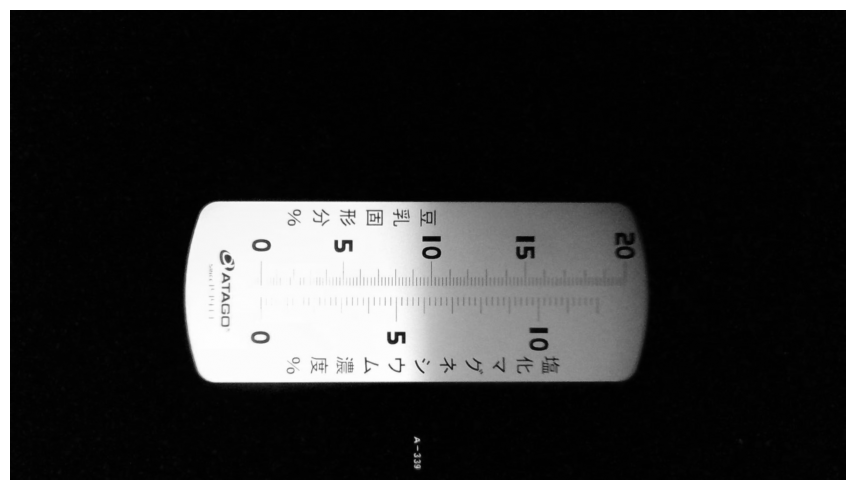

In [191]:
(h, w) = gray_copy.shape[:2]
center = (w // 2, h // 2)

# 평균 각도로 회전 (반시계 방향이 +)
M = cv2.getRotationMatrix2D(center, average_angle, 1.0)
rotated = cv2.warpAffine(gray_copy, M, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REPLICATE)

plt.figure(figsize=(10, 5))
plt.imshow(rotated, cmap="gray")
plt.axis('off')
plt.tight_layout()

plt.show()

crop image shape: (418, 1046)


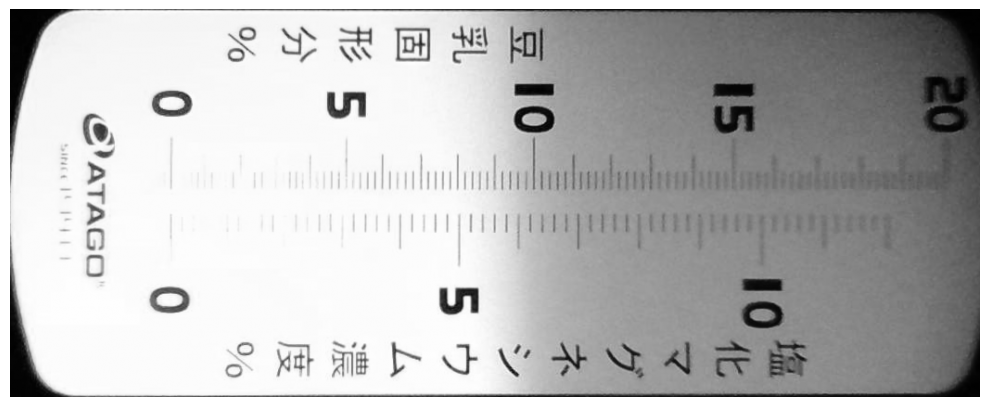

In [314]:
crop_lines = find_edges_line(rotated, 25000, 20000)
crop_image = rotated[crop_lines['top']:crop_lines['bottom'], crop_lines['left']:crop_lines['right']]
print("crop image shape:", crop_image.shape)
plt.figure(figsize=(10, 5))
plt.imshow(crop_image, cmap="gray")
plt.axis('off')
plt.tight_layout()

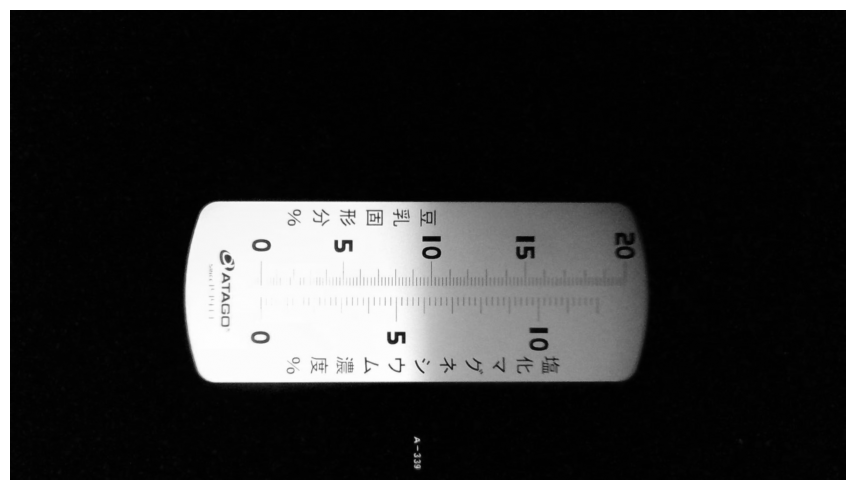

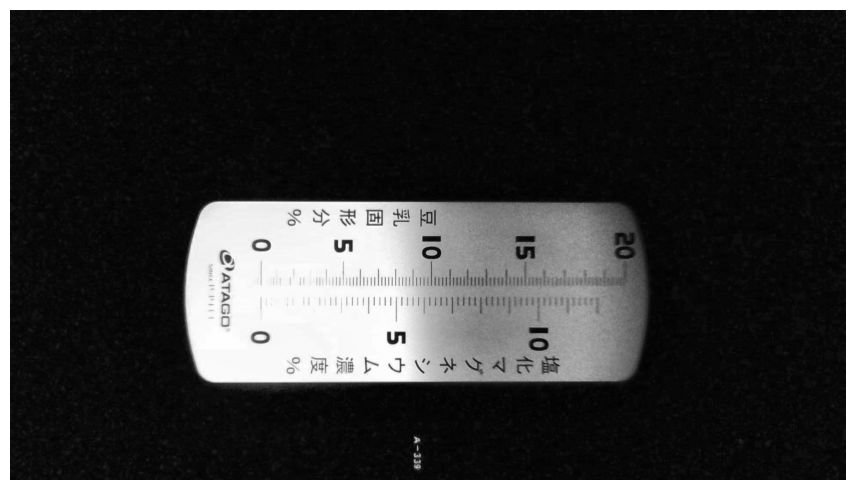

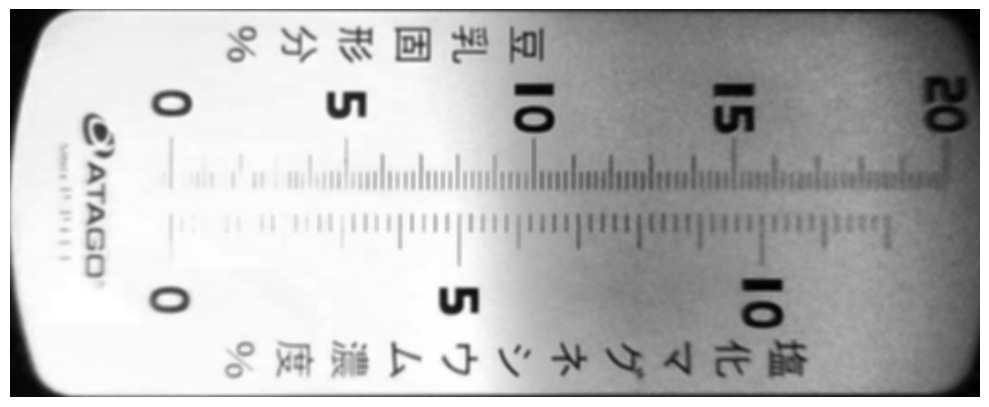

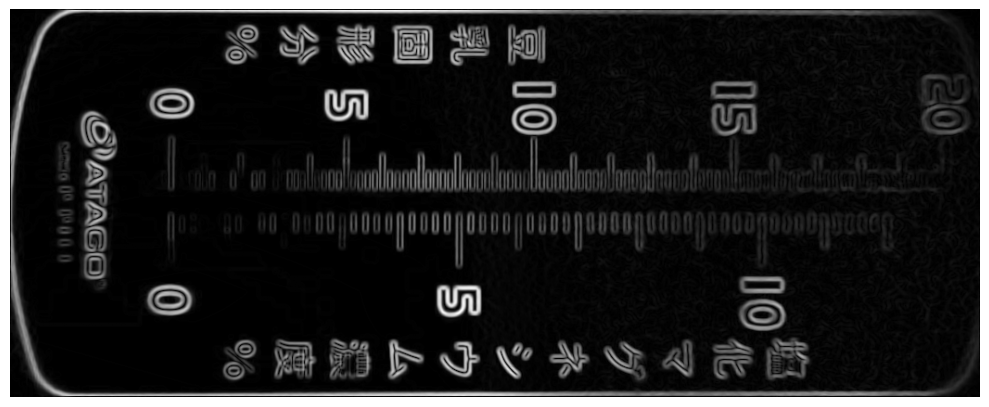

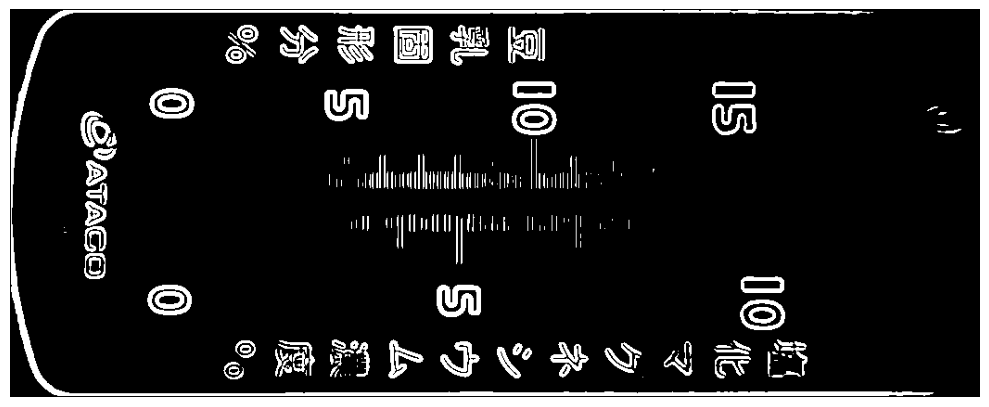

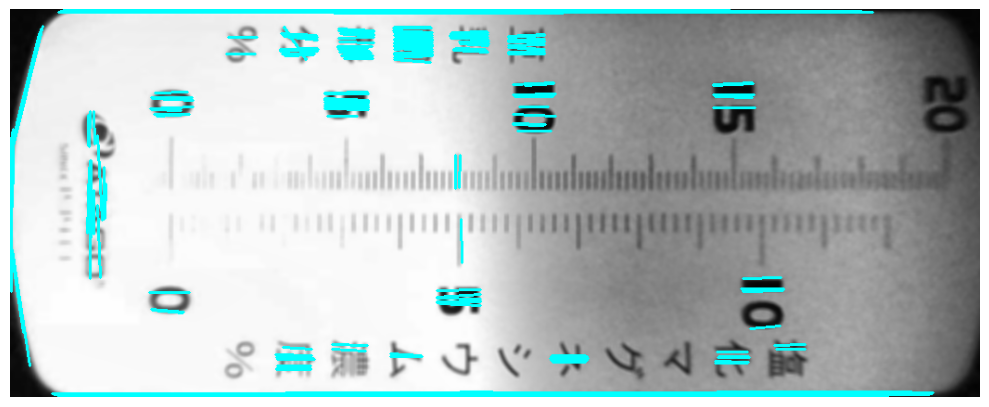

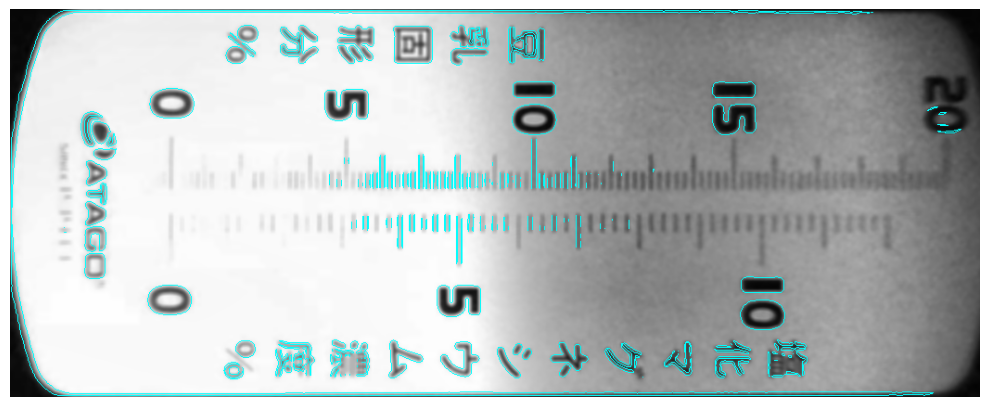

In [193]:
# crop_copy = crop_image.copy()

# clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
# equalized = clahe.apply(crop_copy)
# crop_blur = cv2.blur(equalized, (5, 5), 1.5)

# clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
# equalized = clahe.apply(crop_copy)
# crop_blur = cv2.blur(equalized, (5, 5), 1.5)

rota_copy = rotated.copy()

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
equalized = clahe.apply(rota_copy)
rota_blur = cv2.blur(equalized, (5, 5), 1.5)
crop_blur = rota_blur[crop_lines['top']:crop_lines['bottom'], crop_lines['left']:crop_lines['right']]

sobel_x = cv2.Sobel(crop_blur, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(crop_blur, cv2.CV_64F, 0, 1, ksize=3)

# gradient magnitude 계산
grad_mag = np.sqrt(sobel_x**2 + sobel_y**2)
grad_mag = np.uint8(255 * grad_mag / np.max(grad_mag))  # 정규화

_, binary = cv2.threshold(grad_mag, 80, 255, cv2.THRESH_BINARY)
lines = cv2.HoughLinesP(binary, 1, np.pi / 180, threshold=100,
                        minLineLength=30, maxLineGap=5)

contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
crop_color = cv2.cvtColor(crop_blur, cv2.COLOR_GRAY2BGR)
cv2.drawContours(crop_color, contours, -1, (0, 255, 255), 1)

result = cv2.cvtColor(crop_blur, cv2.COLOR_GRAY2BGR)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(result, (x1, y1), (x2, y2), (0, 255, 255), 2)

# 시각화
plt.figure(figsize=(10, 5))
plt.imshow(rota_copy, cmap='gray')
plt.axis("off")
plt.tight_layout()
plt.figure(figsize=(10, 5))
plt.imshow(equalized, cmap='gray')
plt.axis("off")
plt.tight_layout()

plt.figure(figsize=(10, 5))
plt.imshow(crop_blur, cmap='gray')
plt.axis("off")
plt.tight_layout()

plt.figure(figsize=(10, 5))
plt.imshow(grad_mag, cmap='gray')
plt.axis("off")
plt.tight_layout()

plt.figure(figsize=(10, 5))
plt.imshow(binary, cmap='gray')
plt.axis('off')
plt.tight_layout()

plt.figure(figsize=(10, 5))
plt.imshow(result, cmap='gray')
plt.axis('off')
plt.tight_layout()

plt.figure(figsize=(10, 5))
plt.imshow(crop_color, cmap='gray')
plt.axis('off')
plt.tight_layout()

plt.show()

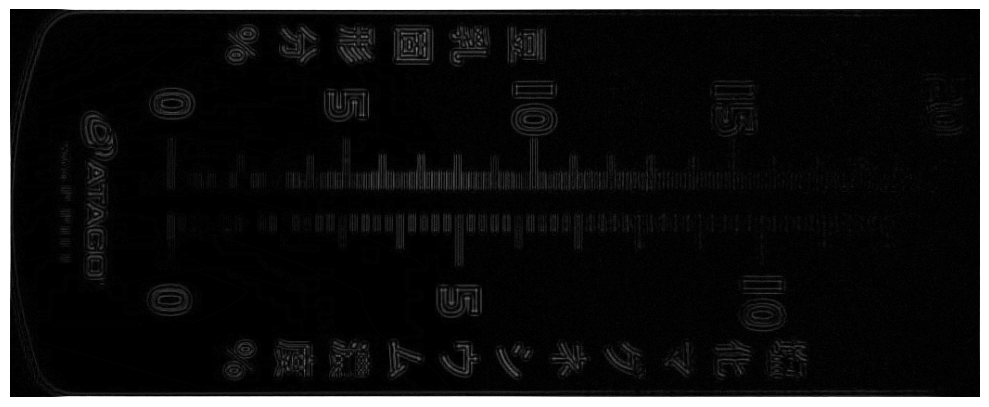

In [194]:
# Laplacian 적용
laplacian = cv2.Laplacian(crop_blur, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))  # 절대값 & 정수형 변환

# 시각화
plt.figure(figsize=(10, 5))
plt.imshow(laplacian, cmap='gray')
plt.axis("off")
plt.tight_layout()
plt.show()

(418, 1046)
crop_blur_copy_crop shape: (418, 926)
(926,)
252 70


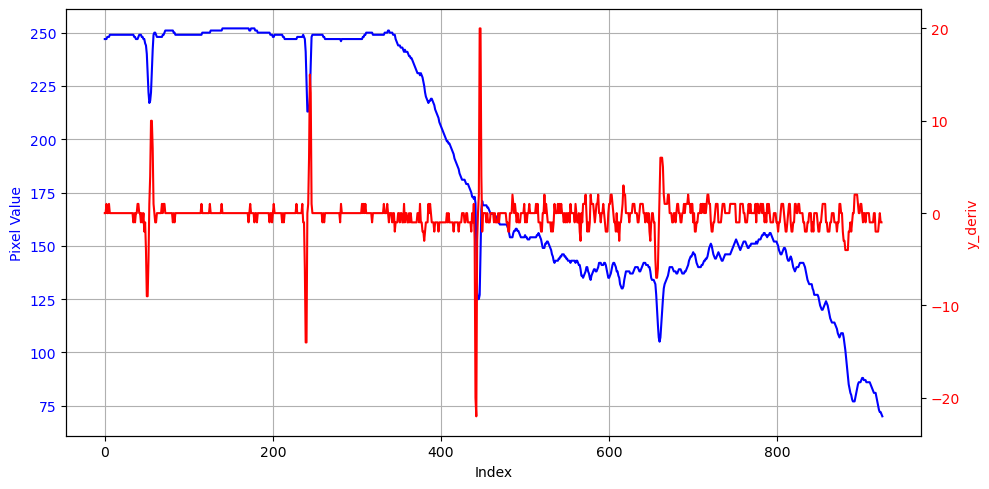

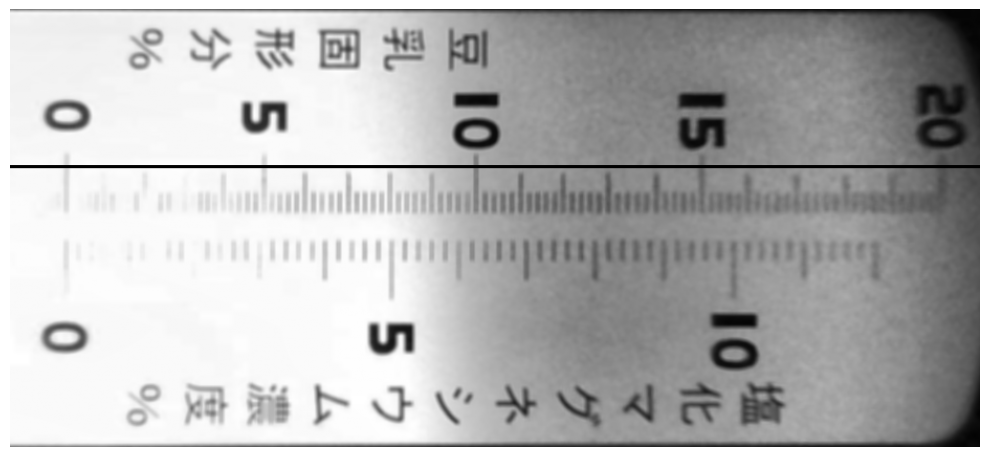

In [ ]:
y = int(crop_blur.shape[0]*0.36)
crop_blur_copy = crop_blur.copy()
# crop_blur_copy = crop_image.copy()
print(crop_blur_copy.shape)
crop_blur_copy_crop = crop_blur_copy[:, 120:]
print("crop_blur_copy_crop shape:", crop_blur_copy_crop.shape)
print(crop_blur_copy_crop[y, :].shape)

pixel_data = crop_blur_copy_crop[y, :].astype(np.int16)
print(max(pixel_data), min(pixel_data))

y_deriv = np.diff(pixel_data, n=1)      # 1차 미분
y_deriv2 = np.diff(pixel_data, n=2)     # 2차 미분

fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(pixel_data, color='b', label='pixel_data')
ax1.set_xlabel("Index")
ax1.set_ylabel("Pixel Value", color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)
ax2 = ax1.twinx()
ax2.plot(y_deriv, color='r', label='y_deriv')
ax2.set_ylabel("y_deriv", color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.tight_layout()

cbccc = crop_blur_copy_crop.copy()
cv2.line(cbccc, (0, y), (crop_blur_copy_crop.shape[1], y), (0, 0, 0), 2)
plt.figure(figsize=(10, 5))
plt.imshow(cbccc, cmap='gray')
plt.axis("off")
plt.tight_layout()

plt.show()

In [196]:
import pandas as pd
# print("pixel_data:", pixel_data)
print("mean pixel_data:", np.mean(pixel_data))
print("max pixel_data:", max(pixel_data), "max pixel_data:", min(pixel_data))
print("-----------------------------------------")
# print("y_deriv:", y_deriv)
print("mean y_deriv:", np.mean(y_deriv))
print("max y_deriv:", max(y_deriv), "max pixel_data:", min(y_deriv))
print("-----------------------------------------")
# print("y_deriv:", y_deriv)
print("mean y_deriv:", np.mean(abs(y_deriv)))
print("max y_deriv:", max(y_deriv), "max pixel_data:", min(y_deriv))

df = pd.DataFrame({
    'pixel_data': pixel_data,
    'y_deriv': np.append(y_deriv, [0])  # diff로 길이 1 작아져서 맞춰줌
})

mean pixel_data: 186.28617710583154
max pixel_data: 252 max pixel_data: 70
-----------------------------------------
mean y_deriv: -0.19135135135135134
max y_deriv: 20 max pixel_data: -22
-----------------------------------------
mean y_deriv: 0.8508108108108108
max y_deriv: 20 max pixel_data: -22


marks2 count: 5
marks2: 53 241 444 666 887
188 203 222 221 

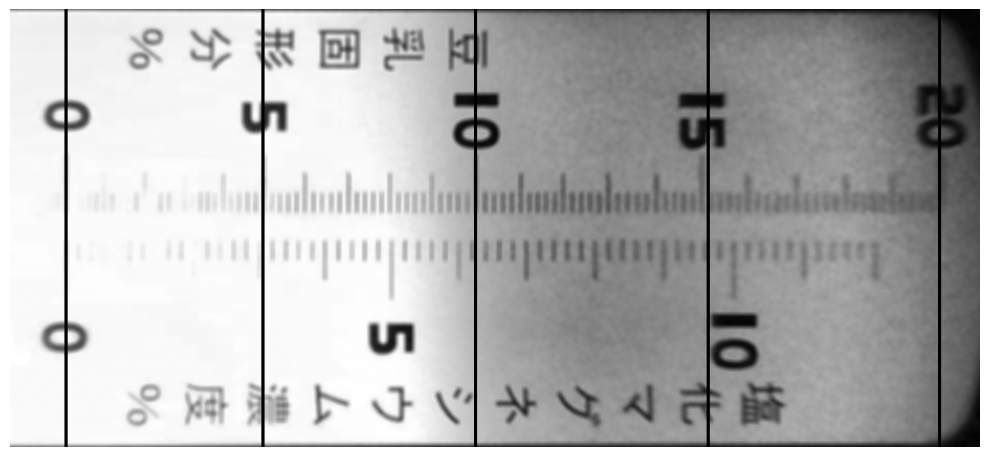

In [197]:
cbccc = crop_blur_copy_crop.copy()

# marks = []
# for idx in range(len(y_deriv)):
#     if y_deriv[idx] <= -4:
#         if (y_deriv[idx-1] > y_deriv[idx]) and (y_deriv[idx] <= y_deriv[idx+1]):
#             marks.append(idx)
# print("marks count:", len(marks))
# print("marks:", *marks)
# for i in range(len(marks)-1): print((marks[i+1] - marks[i]), end=" ")
# print()

marks2 = []
flag = False
for idx in range(len(y_deriv)):
    if flag == True:
        if abs(y_deriv[idx]) <= 1:
            marks2.append(idx)
            flag = False
    elif y_deriv[idx] <= -4:
        flag = True
print("marks2 count:", len(marks2))
print("marks2:", *marks2)
for i in range(len(marks2)-1): print((marks2[i+1] - marks2[i]), end=" ")

for mark in marks2:
    cv2.line(cbccc, (mark, 0), (mark, cbccc.shape[0]), (0, 0, 0), 2)

plt.figure(figsize=(10, 5))
plt.imshow(cbccc, cmap='gray')
plt.axis("off")
plt.tight_layout()

plt.show()

Mean Threshold: 1.7566964285714286
Std Threshold: 4.19272513369878
marks3 count: 4
marks3: 55 243 446 661
188 203 215 

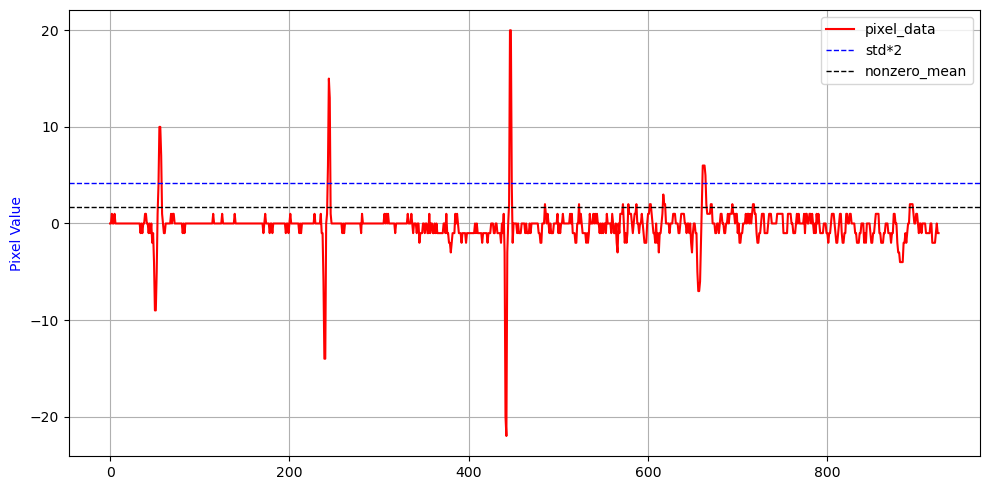

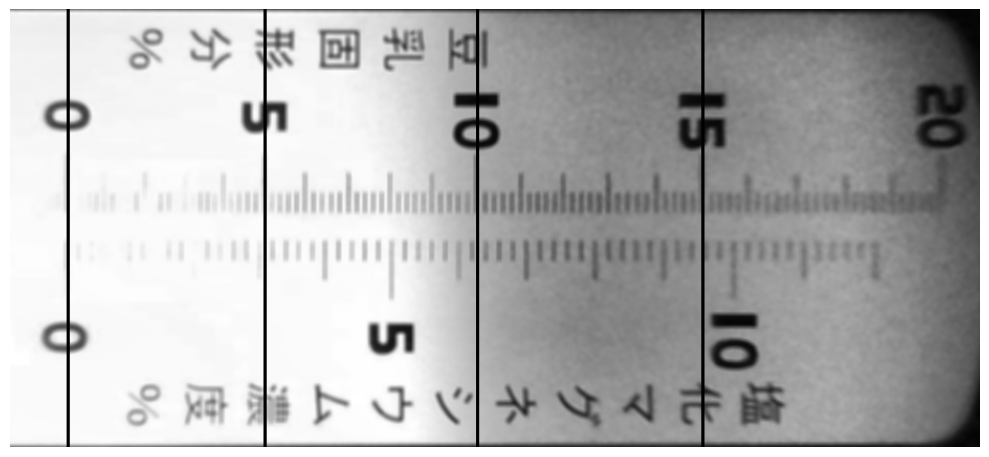

In [198]:
cbccc = crop_blur_copy_crop.copy()

nonzero_y_deriv = y_deriv[y_deriv != 0]
mean_threshold = np.mean(np.abs(nonzero_y_deriv)) * 1
std_threshold = np.std(y_deriv) * 2
print("Mean Threshold:", mean_threshold)
print("Std Threshold:", std_threshold)

marks3 = []
flag = False
idx = 0
while idx < len(y_deriv):
    if y_deriv[idx] > std_threshold:
        marks3.append(idx)
        idx += 20
    else:
        idx += 1

print("marks3 count:", len(marks3))
print("marks3:", *marks3)
for i in range(len(marks3)-1): print((marks3[i+1] - marks3[i]), end=" ")

for mark in marks3:
    cv2.line(cbccc, (mark, 0), (mark, cbccc.shape[0]), (0, 0, 0), 2)

plt.figure(figsize=(10, 5))
plt.plot(y_deriv, color='r', label='pixel_data')
plt.axhline(y=std_threshold, color='b', linestyle='--', linewidth=1, label='std*2')
plt.axhline(y=mean_threshold, color='black', linestyle='--', linewidth=1, label='nonzero_mean')
plt.legend()
plt.ylabel('Pixel Value', color='blue')
plt.grid(True)
plt.tight_layout()

plt.figure(figsize=(10, 5))
plt.imshow(cbccc, cmap='gray')
plt.axis("off")
plt.tight_layout()

plt.show()

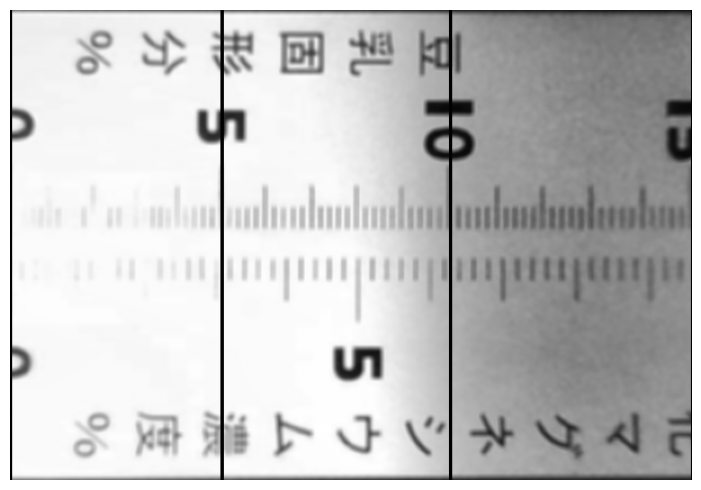

In [199]:
cbccc = cbccc[:, marks3[0]:marks3[-1]]

plt.figure(figsize=(10, 5))
plt.imshow(cbccc, cmap='gray')
plt.axis("off")
plt.tight_layout()

plt.show()

In [201]:
image = crop_blur_copy_crop.copy()
height, width = image.shape[:2]

# 5% 간격으로 수평선 그리기
interval = int(height * 0.05)
color = (0, 255, 0)  # 초록색
thickness = 1        # 선 두께

for y in range(0, height, interval):
    cv2.line(image, (0, y), (width - 1, y), color, thickness)
cv2.line(image, (0, int(height*0.36)), (width - 1, int(height*0.36)), color, 3)

# 결과 보기
cv2.imshow("Horizontal Lines", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

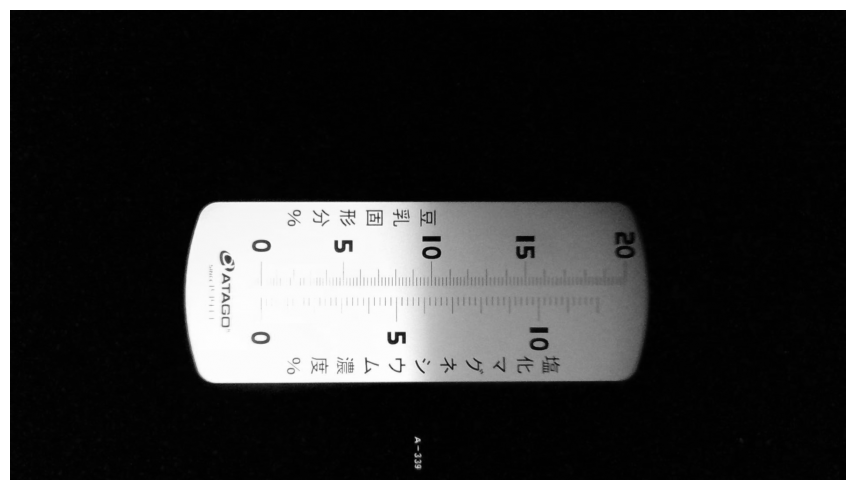

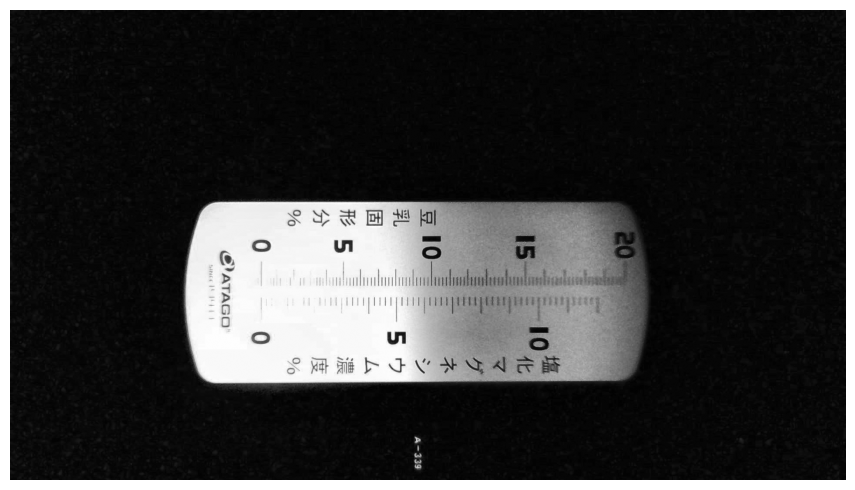

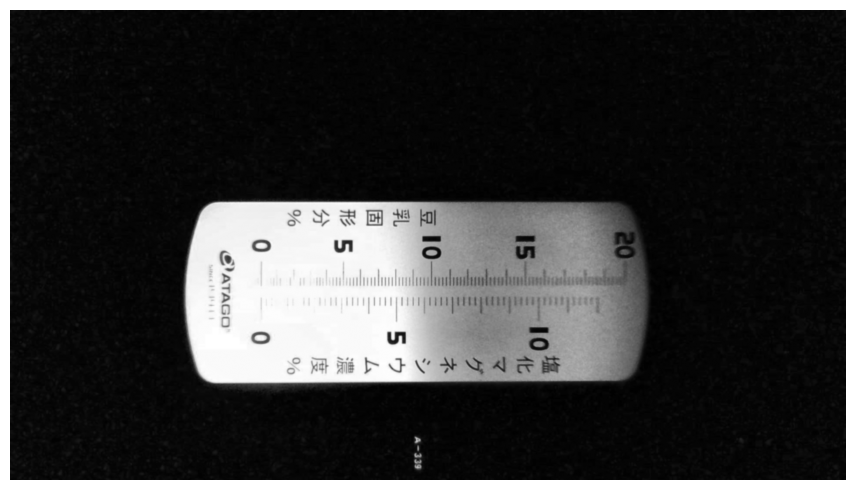

In [266]:
gray = gray_img.copy()

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
equalized = clahe.apply(gray)

equ_blur = cv2.GaussianBlur(equalized, (5, 5), 0)

plt.figure(figsize=(10, 5))
plt.imshow(gray, cmap='gray')
plt.axis("off")
plt.tight_layout()

plt.figure(figsize=(10, 5))
plt.imshow(equalized, cmap='gray')
plt.axis("off")
plt.tight_layout()

plt.figure(figsize=(10, 5))
plt.imshow(equ_blur, cmap='gray')
plt.axis("off")
plt.tight_layout()

plt.show()

(418, 1046)
crop_blur_copy_crop shape: (418, 926)
(926,)
251 74


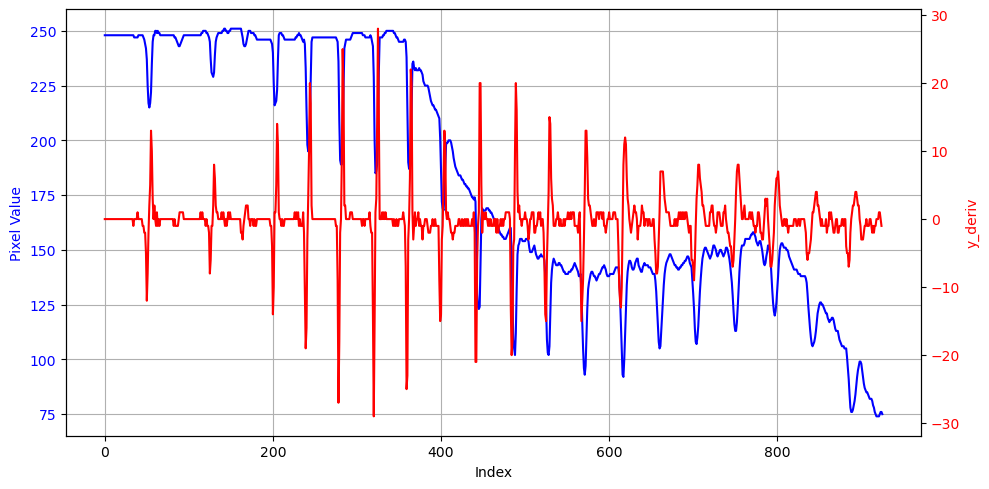

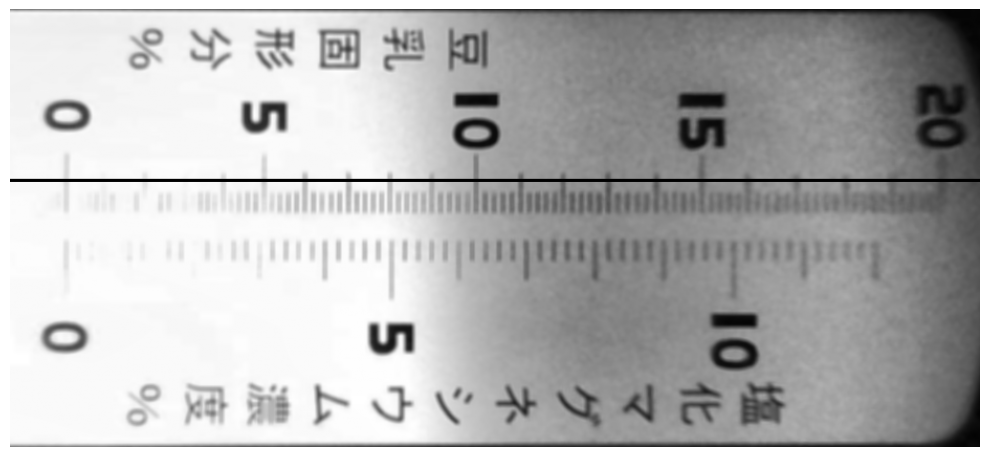

In [285]:
y = int(crop_blur.shape[0]*0.39)
crop_blur_copy = crop_blur.copy()
# crop_blur_copy = crop_image.copy()
print(crop_blur_copy.shape)
crop_blur_copy_crop = crop_blur_copy[:, 120:]
print("crop_blur_copy_crop shape:", crop_blur_copy_crop.shape)
print(crop_blur_copy_crop[y, :].shape)

pixel_data = crop_blur_copy_crop[y, :].astype(np.int16)
print(max(pixel_data), min(pixel_data))

y_deriv = np.diff(pixel_data, n=1)      # 1차 미분
y_deriv2 = np.diff(pixel_data, n=2)     # 2차 미분

fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(pixel_data, color='b', label='pixel_data')
ax1.set_xlabel("Index")
ax1.set_ylabel("Pixel Value", color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)
ax2 = ax1.twinx()
ax2.plot(y_deriv, color='r', label='y_deriv')
ax2.set_ylabel("y_deriv", color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.tight_layout()

cbccc = crop_blur_copy_crop.copy()
cv2.line(cbccc, (0, y), (crop_blur_copy_crop.shape[1], y), (0, 0, 0), 2)
plt.figure(figsize=(10, 5))
plt.imshow(cbccc, cmap='gray')
plt.axis("off")
plt.tight_layout()

plt.show()

(418, 1046)
crop_blur_copy_crop shape: (418, 926)
(926,)
251 74
Mean Threshold: 3.523214285714286
Std Threshold: 9.247736161092956
marks4 count: 12
marks4: 50 200 238 278 319 359 399 441 483 524 567 612
150 38 40 41 40 40 42 42 41 43 45 
marks5 count: 12
marks5: 53 204 242 282 323 363 403 445 487 528 571 617
151 38 40 41 40 40 42 42 41 43 46 

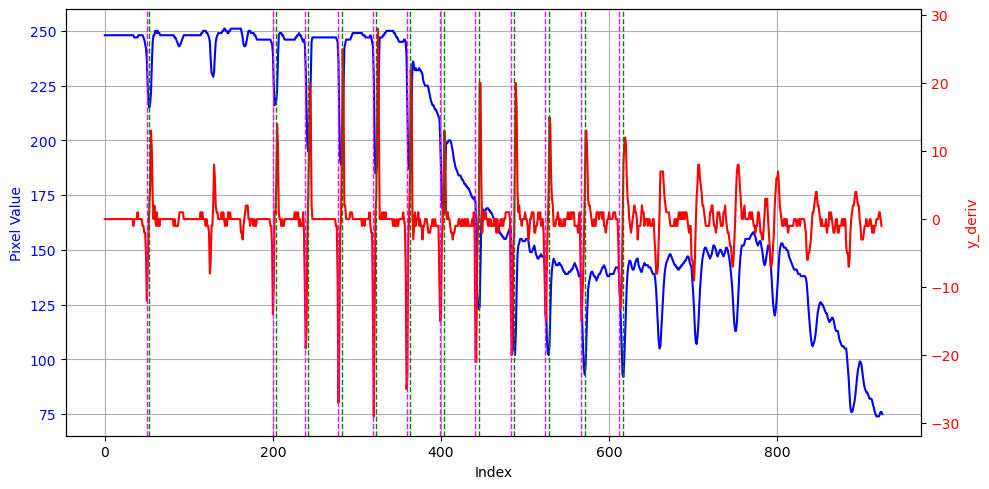

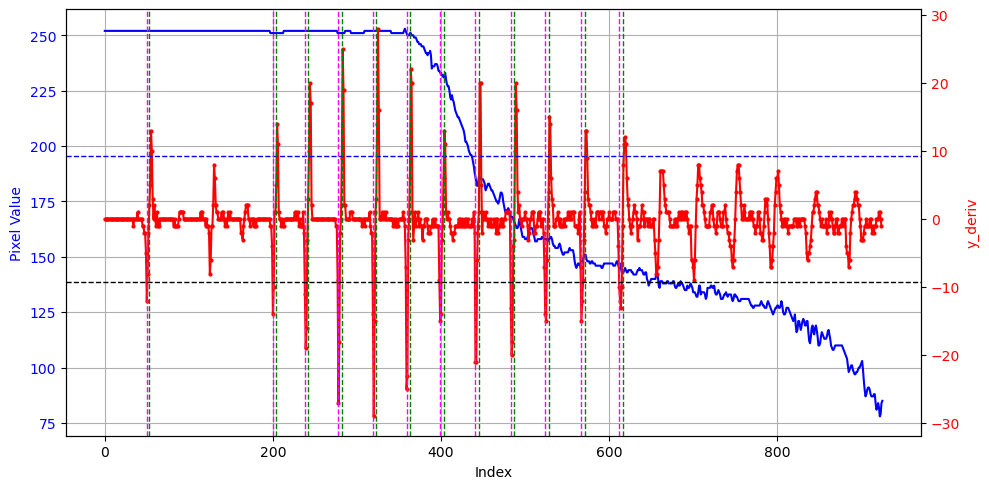

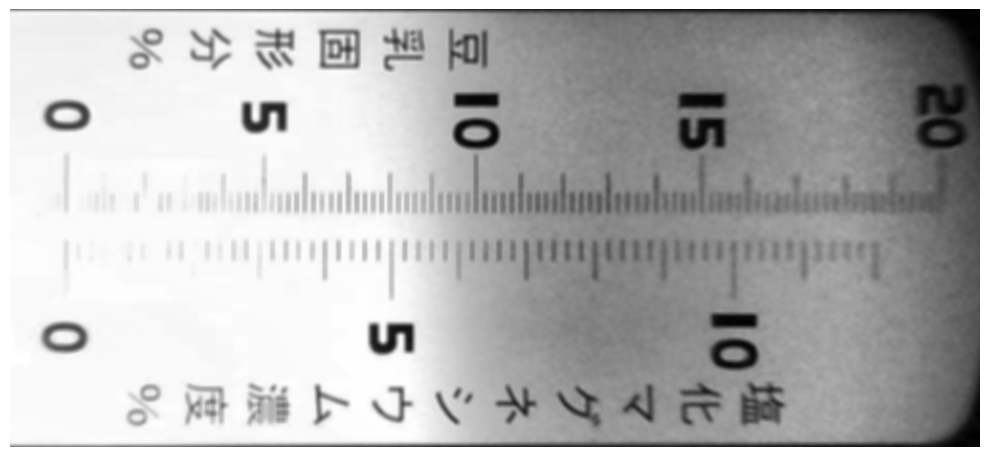

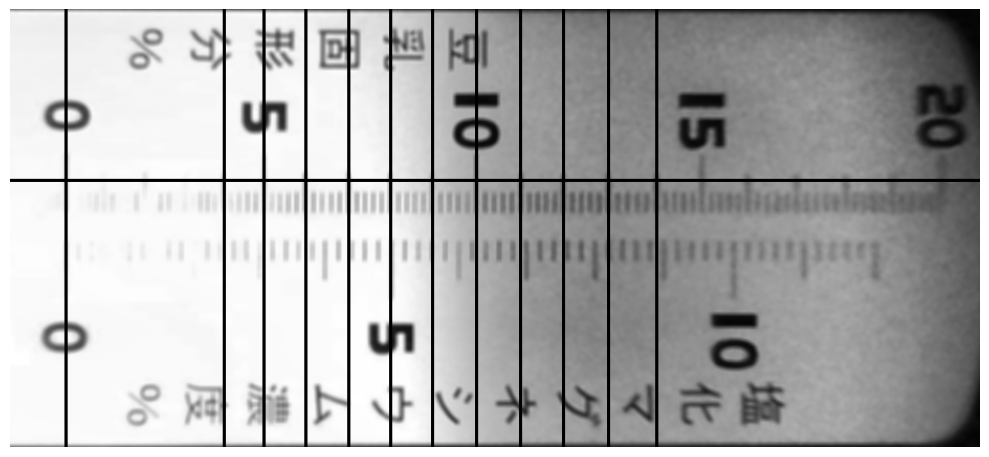

In [341]:
y = int(crop_blur.shape[0]*0.39)
crop_blur_copy = crop_blur.copy()
print(crop_blur_copy.shape)
crop_blur_copy_crop = crop_blur_copy[:, 120:]
print("crop_blur_copy_crop shape:", crop_blur_copy_crop.shape)
print(crop_blur_copy_crop[y, :].shape)

pixel_data = crop_blur_copy_crop[y, :].astype(np.int16)
print(max(pixel_data), min(pixel_data))

y_deriv = np.diff(pixel_data, n=1)      # 1차 미분
y_deriv2 = np.diff(pixel_data, n=2)     # 2차 미분

nonzero_y_deriv = y_deriv[y_deriv != 0]
mean_threshold = np.mean(np.abs(nonzero_y_deriv)) * 1
std_threshold = np.std(y_deriv) * 2
print("Mean Threshold:", mean_threshold)
print("Std Threshold:", std_threshold)

cbccc = crop_blur_copy_crop.copy()

marks4 = []
idx = 0
while idx < len(y_deriv):
    if abs(y_deriv[idx]) > std_threshold:
        marks4.append(idx)
        idx += 20
    else:
        idx += 1

print("marks4 count:", len(marks4))
print("marks4:", *marks4)
for i in range(len(marks4)-1): print((marks4[i+1] - marks4[i]), end=" ")
print()

# for mark in marks4:
#     cv2.line(cbccc, (mark, 0), (mark, cbccc.shape[0]), (0, 0, 0), 2)
# cv2.line(cbccc, (0, y), (cbccc.shape[1], y), (0, 0, 0), 2)

marks5 = []
idx = 0
previous_mark = 0
while idx < len(y_deriv):
    if abs(y_deriv[idx]) > std_threshold:
        if y_deriv[previous_mark] <= 0 and y_deriv[idx] > 0:
            marks5.append((previous_mark + idx) // 2 + 1)
            idx += 20
        previous_mark = idx
        idx += 1
    else:
        idx += 1

print("marks5 count:", len(marks5))
print("marks5:", *marks5)
for i in range(len(marks5)-1): print((marks5[i+1] - marks5[i]), end=" ")

for mark in marks5:
    cv2.line(cbccc, (mark, 0), (mark, cbccc.shape[0]), (0, 0, 0), 2)
cv2.line(cbccc, (0, y), (cbccc.shape[1], y), (0, 0, 0), 2)

fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(crop_blur_copy_crop[y, :], color='b', label='pixel_data')
ax1.set_xlabel("Index")
ax1.set_ylabel("Pixel Value", color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)
ax2 = ax1.twinx()
ax2.plot(y_deriv, color='r', label='y_deriv')
for mark in marks4:
    ax2.axvline(x=mark, color='magenta', linestyle='--', linewidth=1, label='marks4')
for mark in marks5:
    ax2.axvline(x=mark, color='g', linestyle='--', linewidth=1, label='marks5')
ax2.set_ylabel("y_deriv", color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.tight_layout()

rota_crop = rota_copy[crop_lines['top']:crop_lines['bottom'], crop_lines['left']:crop_lines['right']]
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(rota_crop[int(crop_blur.shape[0]*0.5), 120:], color='b', label='pixel_data')
ax1.set_xlabel("Index")
ax1.set_ylabel("Pixel Value", color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)
ax2 = ax1.twinx()
ax2.plot(y_deriv, color='r', label='y_deriv', marker='o', markersize=2)
ax2.axhline(y=std_threshold, color='b', linestyle='--', linewidth=1, label='std theshold')
ax2.axhline(y=-std_threshold, color='black', linestyle='--', linewidth=1, label='std theshold')
for mark in marks4:
    ax2.axvline(x=mark, color='magenta', linestyle='--', linewidth=1, label='marks4')
for mark in marks5:
    ax2.axvline(x=mark, color='g', linestyle='--', linewidth=1, label='marks5')
ax2.set_ylabel("y_deriv", color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.tight_layout()

plt.figure(figsize=(10, 5))
plt.imshow(crop_blur_copy_crop.copy(), cmap='gray')
plt.axis("off")
plt.tight_layout()

plt.figure(figsize=(10, 5))
plt.imshow(cbccc, cmap='gray')
plt.axis("off")
plt.tight_layout()

plt.show()